# Index

* [Detectability](#Detectability)
* [Accretion Rates](#Stellar-Accretion-Rates)
* [Jet Power](#Jet-Power)
  * [Individual Star jet/energy luminosity](#Individual-star-jet-energy-and-luminosity)
  * [Population jet energy/luminosity](#Population-Kinetic-Energy-Injection)
  * [Which mass dominates](#How-does-jet-power-scale-with-mass?--Which-mass-dominates?)
* [Star-powered feedback](#Star-powered-feedback)
* [Decay timescale for turbulence](#Decay-Timescale-for-Turbulence-in-the-CMZ)

# Question: How much can accretion onto main-sequence stars affect turbulence?

1. Direct BH accretion - no immediate effect
2. The trails of BH accretion - maybe some effect?  (dynamical friction)
3. Accreted material produces outflows - at least adds momentum, stirring.  How much?  (energy prob. radiated away)
4. Chemical enrichment - accretion -> outflow process shatters grains.  How much "unprocessed" material results?

Dynamical Friction

 * https://ui.adsabs.harvard.edu/#abs/1943ApJ....97..255C/abstract Chandrasekher
 * https://ui.adsabs.harvard.edu/#abs/1999ApJ...513..252O/abstract Ostriker
 * https://ui.adsabs.harvard.edu/#abs/2011MNRAS.416.3177L/abstract Lee & Stahler
 * https://ui.adsabs.harvard.edu/abs/2014A%26A...561A..84L/abstract Lee & Stahler

The Nuclear Disk rotates with the gas

 * https://ui.adsabs.harvard.edu/#abs/2015ApJ...812L..21S/abstract Schoenrich 2015
 * https://ui.adsabs.harvard.edu/#abs/2021arXiv210410439S/abstract Schultheis 2021


# What about B-stars?  Can their winds drive turbulence?

Reference from Jonny:
https://www.aanda.org/articles/aa/pdf/2007/38/aa7545-07.pdf (https://ui.adsabs.harvard.edu/abs/2007A%26A...473..603M/abstract)


# Bondi-Hoyle Accretion

References about BH accretion:

Bondi 1952 http://articles.adsabs.harvard.edu/pdf/1952MNRAS.112..195B

Bondi 1944 https://ui.adsabs.harvard.edu/abs/1944MNRAS.104..273B/abstract

Krumholz 2006 https://iopscience.iop.org/article/10.1086/498844/pdf




Krumholz's turbulent-modified version:

$$\dot{M}_{BH} = 4 \pi \rho_\infty G^2 M^2 c_\infty^{-3} \left[\frac{\lambda^2+\mathcal{M}^2}{\left(1+\mathcal{M}^2\right)^4}\right]^{1/2}$$

$\mathcal{M}=0$ -> $\lambda = e^{1.5}/4 \approx 1.1$

In [1]:
from astropy import units as u
from astropy import constants

In [2]:
def mdot_bh(mass, soundspeed, density, starspeed=0*u.km/u.s, machnumber=0, lam=1.1):
    """
    Compute the Bondi-Hoyle accretion rate.
    
    Based on Krumholz+ 2006 formulation
    """
    right = ((lam**2 + machnumber**2) / (1+machnumber**2)**4)**0.5
    speed = (soundspeed**2 + starspeed**2)**0.5
    return (4 * np.pi * density * constants.G**2 * mass**2 * speed**-3 * right).to(u.Msun/u.yr)

In [3]:
def bondi_radius(mass, soundspeed, starspeed=0*u.km/u.s):
    """
    Given a mass, sound speed, and star speed, calculate the Bondi radius.
    
    R_Bondi = 2 G M / (c_s^2 + v_*^2)
    """
    # {\displaystyle 2GM/c_{s}^{2}}.
    return (2*constants.G*mass/(starspeed**2+soundspeed**2)).to(u.au)

In [4]:
def vesc(mass, radius):
    """
    Escape speed from the surface of an object
    """
    return ((2*constants.G*mass/radius)**0.5).to(u.km/u.s)

In [5]:
def affected_volume(mass, soundspeed, starspeed):
    """
    Given a star of some mass and speed, and some gas sound speed, what volume is encompassed
    in the star's Bondi radius
    by the star's travel through the medium?
    """
    return (np.pi * bondi_radius(mass, soundspeed, starspeed=starspeed)**2 * starspeed).to(u.pc**3/u.yr)

## If stars are BH-accreting, is their accretion detectable?

We use the same accretion-to-recombination line estimates as in my Pa$\alpha$ proposals to predict detectability.

In [6]:
from astroquery.svo_fps import SvoFps

In [ ]:
# https://github.com/keflavich/paa_analysis/blob/0bb973b4a1510591d3075ef86d7c35098cf09db7/paper/jwst_paa_estimates.py
import numpy as np
from astropy import units as u
from astropy import constants
from pyspeckit.spectrum.models import hydrogen

#from hii_sensitivity import ha_to_hb_1e4, paa_to_hb_1e4, bra_to_hgamma_1e4, pab_to_hgamma_1e4, hg_to_hb_1e4, wl_paa

# from table in Draine
alpha_b_5e3 = 4.53e-13*u.cm**3*u.s**-1
alpha_b_1e4 = 2.59e-13*u.cm**3*u.s**-1
alpha_b_2e4 = 1.43e-13*u.cm**3*u.s**-1
alpha_b_beta_1e4 = 3.03e-14*u.cm**3*u.s**-1

wl_hbeta = hydrogen.wavelength['balmerb']*u.um
nu_hbeta = wl_hbeta.to(u.Hz, u.spectral())

wl_halpha = hydrogen.wavelength['balmera']*u.um
nu_halpha = wl_halpha.to(u.Hz, u.spectral())
e_halpha = wl_halpha.to(u.erg, u.spectral())

wl_bra = hydrogen.wavelength['bracketta']*u.um
e_bra = wl_bra.to(u.erg, u.spectral())
nu_bra = wl_bra.to(u.Hz, u.spectral())

wl_paa = hydrogen.wavelength['paschena']*u.um
e_bra = wl_paa.to(u.erg, u.spectral())
nu_bra = wl_paa.to(u.Hz, u.spectral())

# ratio of paa to hbeta
paa_to_hb_1e4 = 0.336
# ratio of H-alpha to H-beta
ha_to_hb_1e4 = 2.86
hg_to_hb_1e4 = 0.469
pab_to_hgamma_1e4 = 0.347
bra_to_hgamma_1e4 = 0.169
bra_to_hb_1e4 = bra_to_hgamma_1e4 * hg_to_hb_1e4


from astroquery.svo_fps import SvoFps

wl_bra = hydrogen.wavelength['bracketta']*u.um
twomass = SvoFps.get_filter_list('2MASS')
wl_Ks = twomass[twomass['filterID'].astype(str)=='2MASS/2MASS.Ks']['WavelengthCen'][0] * u.AA
def cardelli_law(wavelength, RV=3):
    wavenumber = (wavelength.to(u.um**-1, u.spectral())).value
    a = 0.574 * wavenumber**1.61
    b = -0.527 * wavenumber**1.61
    A_lambda = a + b / RV
    return A_lambda


def lacc(mdot, rstar=u.R_sun, mstar=u.M_sun):
    # Alcala+ 2017 eqn 1
    # 1.25 comes from assuming r_inner disk = 5 r_star
    return (mdot / 1.25 * constants.G * mstar / rstar).to(u.L_sun)

def log_pab(lacc):
    # from table B1 of Alcala+2017:
    # log L_acc = 1.06 log L_pab + 2.76
    # so
    # log L_pab = (log L_acc - 2.76) / 1.06
    return 1/1.06 * np.log10(lacc/u.L_sun) - 2.76/1.06

def log_paa(lacc):
    # pab * (paa / hb) * (hb / hg) *  (hg / pab)
    return log_pab(lacc) + np.log10(paa_to_hb_1e4 / hg_to_hb_1e4 / pab_to_hgamma_1e4)

def log_bra(lacc):
    # brackett alpha prediction from PaB (could use BrG too...)
    return log_pab(lacc) + np.log10(bra_to_hgamma_1e4 / pab_to_hgamma_1e4)

def L_paa(lacc):
    return 10**log_paa(lacc) * u.L_sun

def L_bra(lacc):
    return 10**log_bra(lacc) * u.L_sun

def S_paa(lacc, distance=8*u.kpc, A_K=0):
    A_paa = (cardelli_law(wl_paa) / cardelli_law(wl_Ks)) * A_K
    attenuation = 10**(-A_paa / 2.5)
    return (L_paa(lacc) / (4*np.pi*distance**2)).to(u.erg/u.s/u.cm**2) * attenuation

def S_bra(lacc, distance=8*u.kpc, A_K=0):
    A_bra = (cardelli_law(wl_bra) / cardelli_law(wl_Ks)) * A_K
    attenuation = 10**(-A_bra / 2.5)
    return (L_bra(lacc) / (4*np.pi*distance**2)).to(u.erg/u.s/u.cm**2) * attenuation

In [8]:
%matplotlib inline
import pylab as pl
pl.style.use('dark_background')
pl.rcParams['figure.figsize'] = (12,10)
pl.rcParams['font.size'] = 16
from astropy import visualization
visualization.quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7effef85c710>

At what rate do stars affect the gas ("process" it through BH accretion)?

Text(0, 0.5, 'Affected Volume (pc$^3$ yr$^{-1}$)')

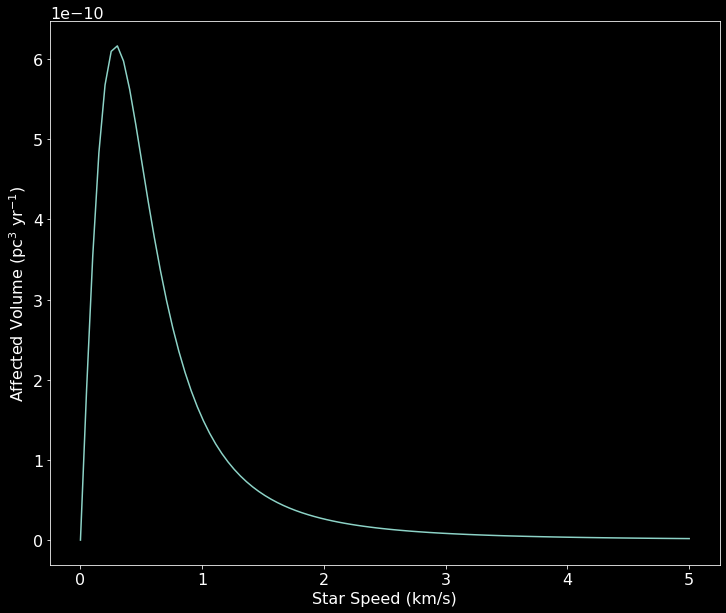

In [9]:
starspeeds = np.linspace(0,5,100) *u.km/u.s
pl.plot(starspeeds, affected_volume(1*u.M_sun, 0.5*u.km/u.s, starspeeds))
pl.xlabel("Star Speed (km/s)")
pl.ylabel("Affected Volume (pc$^3$ yr$^{-1}$)")

If we assume a certain number of stars moving at a given relative velocity, how long would it take for the whole volume to be reprocessed?

divide by zero encountered in true_divide


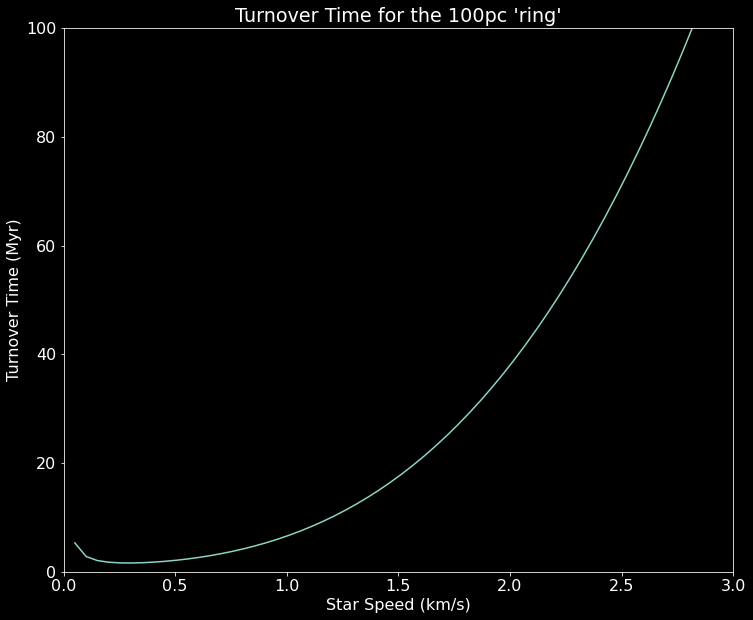

In [10]:
starspeeds = np.linspace(0,5,100) *u.km/u.s
ringvolume = (100*u.pc)**2 * np.pi * 10*u.pc
stellardensity = 1000*u.pc**-3
nstars = (stellardensity * ringvolume).decompose()
pl.plot(starspeeds, (ringvolume/affected_volume(1*u.M_sun, 0.5*u.km/u.s, starspeeds)).to(u.Myr) / nstars)
pl.xlabel("Star Speed (km/s)")
pl.ylabel("Turnover Time (Myr)")
pl.title("Turnover Time for the 100pc 'ring'")
pl.axis([0,3,0,100])
None

# Detectability 

[Index](#Index)

Detectability: How bright are the accreting stars in Brackett Alpha?

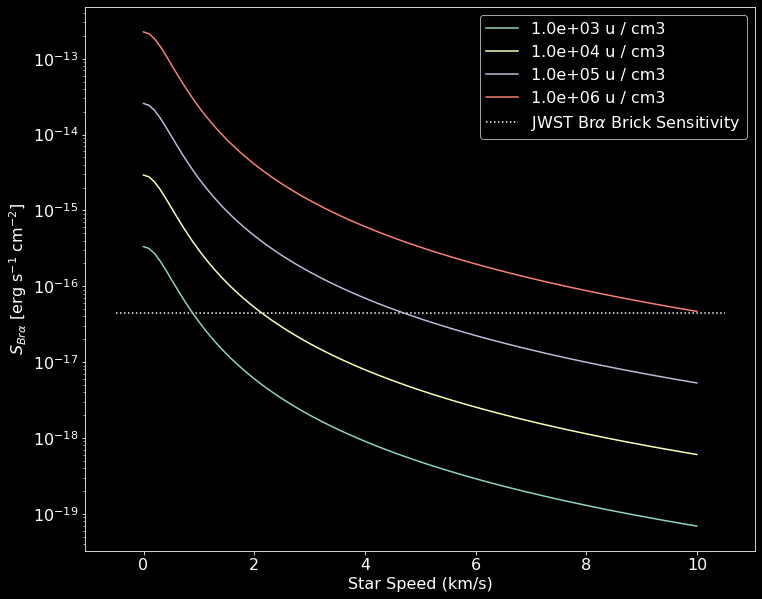

In [162]:
starspeeds = np.linspace(0,10,100) *u.km/u.s
for density in (1e3,1e4,1e5,1e6)*u.Da/u.cm**3:
    md = mdot_bh(1*u.M_sun, 0.5*u.km/u.s, density=density, starspeed=starspeeds)
    la = lacc(md)
    sbr = S_bra(la, distance=8*u.kpc, A_K=2.5)
    pl.semilogy(starspeeds, sbr, label=f"{density:0.1e}")
pl.hlines((4.5*10**-17*u.erg/u.s/u.cm**2).value, *pl.xlim(), label='JWST Br$\\alpha$ Brick Sensitivity', linestyle=':', color='w')

pl.legend(loc='best')
pl.xlabel("Star Speed (km/s)",fontsize=16)
_=pl.ylabel("$S_{Br\\alpha}$ [erg s$^{-1}$ cm$^{-2}$]",fontsize=16)

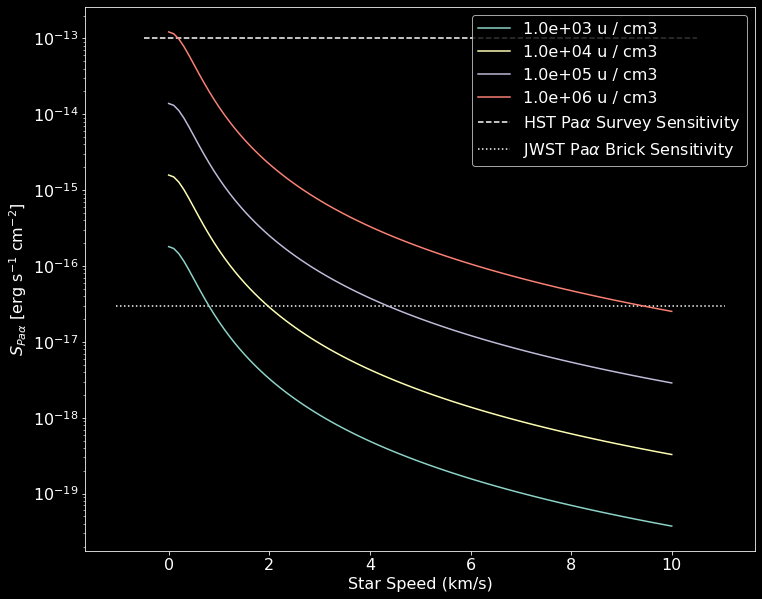

In [163]:
starspeeds = np.linspace(0,10,100) *u.km/u.s
for density in (1e3,1e4,1e5,1e6)*u.Da/u.cm**3:
    md = mdot_bh(1*u.M_sun, 0.5*u.km/u.s, density=density, starspeed=starspeeds)
    la = lacc(md)
    spaa = S_paa(la, distance=8*u.kpc, A_K=2.5)
    pl.semilogy(starspeeds, spaa, label=f"{density:0.1e}")
pl.hlines(10**-13*u.erg/u.s/u.cm**2, *pl.xlim(), label='HST Pa$\\alpha$ Survey Sensitivity', linestyle='--', color='w')
pl.hlines(3*10**-17*u.erg/u.s/u.cm**2, *pl.xlim(), label='JWST Pa$\\alpha$ Brick Sensitivity', linestyle=':', color='w')
pl.legend(loc='best')
pl.xlabel("Star Speed (km/s)",fontsize=16)
_=pl.ylabel("$S_{Pa\\alpha}$ [erg s$^{-1}$ cm$^{-2}$]",fontsize=16)

Conclusion: Stars moving with small velocity relative to The Brick will have detectable accretion signatures - if we ignore extinction.  With extinction, this is less clear.

## Stellar Accretion Rates

[Index](#Index)


For a range of uniform densities, what are the expected accretion rates for a solar mass star?

(this section is for reference numbers, to inform my thinking)

Text(0, 0.5, 'Accretion Rate')

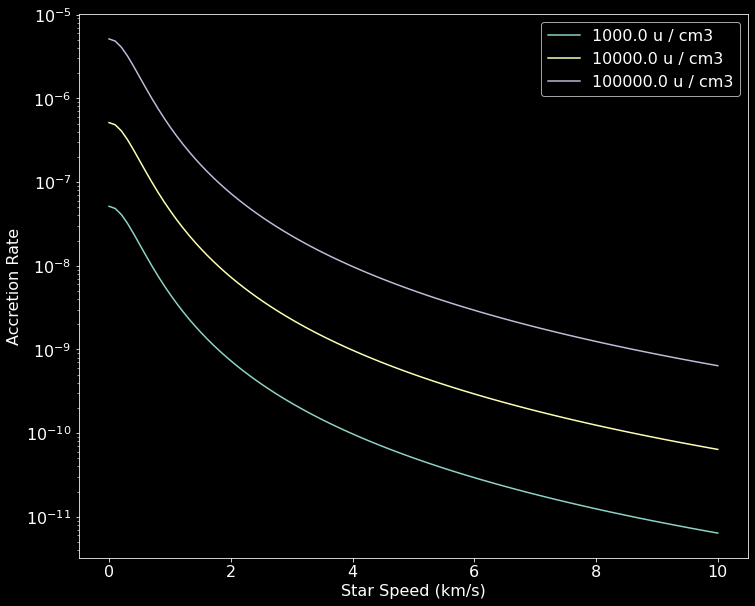

In [13]:
starspeeds = np.linspace(0,10,100) * u.km/u.s
for density in (1e3,1e4,1e5)*u.Da/u.cm**3:
    pl.semilogy(starspeeds, mdot_bh(1*u.M_sun,
                                    soundspeed=0.5*u.km/u.s,
                                    density=density,
                                    starspeed=starspeeds),
                label=str(density))
pl.legend(loc='best')
pl.xlabel("Star Speed (km/s)")
pl.ylabel("Accretion Rate")

## Same, but for a 0.1 Msun star

[Index](#Index)


Text(0, 0.5, 'Accretion Rate')

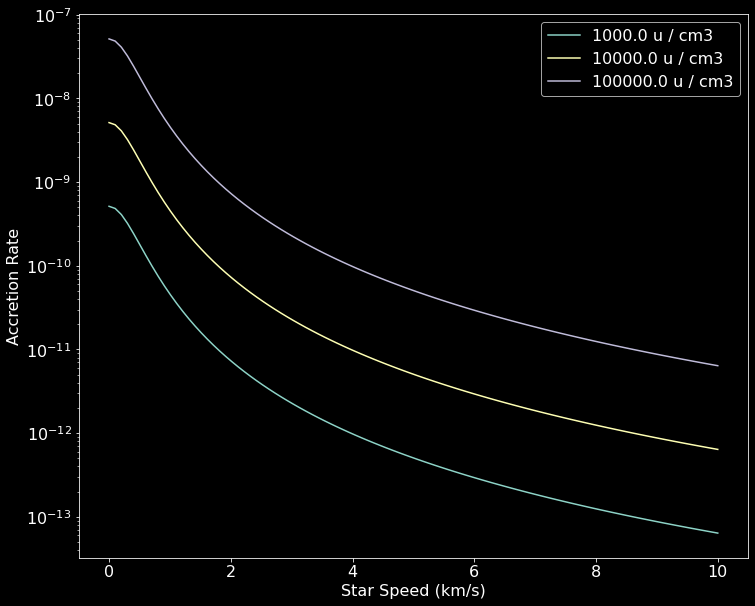

In [14]:
starspeeds = np.linspace(0,10,100) * u.km/u.s
for density in (1e3,1e4,1e5)*u.Da/u.cm**3:
    pl.semilogy(starspeeds, mdot_bh(0.1*u.M_sun,
                                    soundspeed=0.5*u.km/u.s,
                                    density=density,
                                    starspeed=starspeeds),
                label=str(density))
pl.legend(loc='best')
pl.xlabel("Star Speed (km/s)")
pl.ylabel("Accretion Rate")

### Specific evaluations of accretion rate for a variety of inputs

[Index](#Index)


In [15]:
mdot_bh(1*u.Msun, 0.2*u.km/u.s, 1e4*u.cm**-3*u.Da)

<Quantity 8.02015911e-06 solMass / yr>

In [16]:
mdot_bh(1*u.Msun, 0.2*u.km/u.s, 1e4*u.cm**-3*u.Da, machnumber=1)

<Quantity 2.70973265e-06 solMass / yr>

In [17]:
mdot_bh(1*u.Msun, 0.2*u.km/u.s, 1e4*u.cm**-3*u.Da, machnumber=2)

<Quantity 6.65685584e-07 solMass / yr>

In [18]:
mdot_bh(1*u.Msun, 0.2*u.km/u.s, 1e4*u.cm**-3*u.Da, machnumber=10)

<Quantity 7.19050287e-09 solMass / yr>

In [19]:
mdot_bh(1*u.Msun, 0.5*u.km/u.s, 1e4*u.cm**-3*u.Da, machnumber=10)

<Quantity 4.60192184e-10 solMass / yr>

In [20]:
bondi_radius(1*u.M_sun, 0.2*u.km/u.s)

<Quantity 44356.39336944 AU>

In [21]:
bondi_radius(1*u.M_sun, 0.5*u.km/u.s)

<Quantity 7097.02293911 AU>

In [22]:
bondi_radius(1*u.M_sun, 0.5*u.km/u.s, 5*u.km/u.s), mdot_bh(1*u.Msun, 0.5*u.km/u.s, 1e5*u.cm**-3*u.Da, machnumber=0, starspeed=5*u.km/u.s)

(<Quantity 70.26755385 AU>, <Quantity 5.05685962e-09 solMass / yr>)

In [23]:
vesc(1*u.M_sun, 1*u.R_sun)

<Quantity 617.67470028 km / s>

# Jet Power

[Index](#Index)

If a star is BH-accreting, how much momentum and energy does it feed back into the medium?

In [119]:
def jet_power(mass, radius, density=1e5*u.Da/u.cm**3,
              soundspeed=0.5*u.km/u.s, efficiency=0.1,
              vesc_frac=1,
              starspeed=5*u.km/u.s):
    """
    How much of the accreted material is ejected back into the ISM?
    
    Assume it is ejected at vjet = the escape velocity from the star
    
    default efficiency is 0.1 and is pretty arbitrary.  Might be informed by Offner's 2014, 2017 papers:
    she adopts f_w = 0.21 but vjet = 0.3 v_orb = 0.3 / sqrt(2) vesc
    """
    mdot = mdot_bh(mass, soundspeed, density=density, machnumber=0, starspeed=starspeed)
    vjet = vesc_frac * vesc(mass, radius)
    jetpower = vjet * mdot * efficiency
    jetlum = ((0.5*vjet**2 * mdot).to(u.erg/u.s) * efficiency).to(u.L_sun)
    return jetpower, jetlum

In [120]:
jet_power(1*u.M_sun, 1*u.R_sun)

(<Quantity 3.12349425e-07 km solMass / (s yr)>, <Quantity 0.01587817 solLum>)

In [121]:
jet_power(1*u.M_sun, 1*u.R_sun, efficiency=0.21, vesc_frac=0.3/np.sqrt(2))

(<Quantity 1.3914457e-07 km solMass / (s yr)>, <Quantity 0.00150049 solLum>)

In [122]:
jet_power(1*u.M_sun, 1*u.R_sun, efficiency=0.1, vesc_frac=1, starspeed=2*u.km/u.s)

(<Quantity 4.52323748e-06 km solMass / (s yr)>, <Quantity 0.22993719 solLum>)

For a 1 solar mass star moving slowly enough, the jet energy may match the intrinsic luminosity _if_ the outflow is all in a jet.

The direct accretion luminosity will be greater.

### Individual star jet energy and luminosity

[Index](#Index)

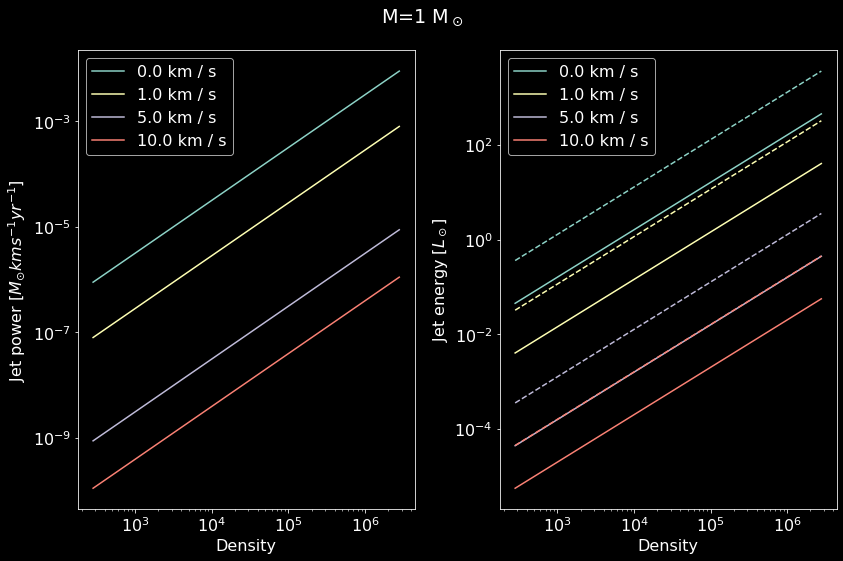

In [123]:
pl.figure(figsize=(12,8))
density = np.logspace(2,6)*u.Da/u.cm**3 * 2.8
starspeeds = [0, 1, 5, 10]*u.km/u.s
soundspeed = 0.5 * u.km/u.s
pl.subplot(1,2,1)
for starspeed in starspeeds:
    pl.loglog(density, jet_power(1*u.M_sun, 1*u.R_sun, density=density,
                                 soundspeed=soundspeed,
                                 starspeed=starspeed)[0].to(u.Msun*u.km/u.s/u.yr),
             label=str(starspeed))
pl.xlabel("Density")
pl.ylabel("Jet power [$M_{\odot} km s^{-1} yr^{-1}$]")
pl.legend(loc='best')
pl.subplot(1,2,2)
for starspeed in starspeeds:
    mdot = mdot_bh(mass=1*u.M_sun, starspeed=starspeed, soundspeed=soundspeed, density=density)
    accr_lum = lacc(mdot, rstar=u.R_sun, mstar=1*u.M_sun)
    line, = pl.loglog(density, jet_power(1*u.M_sun, 1*u.R_sun, density=density,
                                         starspeed=starspeed)[1].to(u.Lsun),
              label=str(starspeed))
    pl.loglog(density, accr_lum, linestyle='--', color=line.get_color())
pl.legend(loc='best')
pl.xlabel("Density")
pl.ylabel("Jet energy [$L_\odot$]")

_=pl.suptitle("M=1 M$_\odot$")
_=pl.tight_layout()

The accretion luminosity (dashed line on the right) exceeds the jet luminosity by construction (the accretion luminosity is all the material hitting the surface; the jet luminosity is taking some of that and spitting it back out at $v_{esc}$.

Does the momentum driving matter?

# Does momentum driving matter?

[Index](#Index)


Since the jet energy is rapidly radiated away, the feedback is primarily coming in the form of momentum driving.  (e.g., Offner+2014, 2017)

The momentum density is $m v / V = \rho v$.

How much momentum is there in the turbulent gas?  How is momentum related to energy in turbulent gas?

# Population Kinetic Energy Injection

[Index](#Index)

How much energy is introduced into the medium by protostellar outflows?

Assume:

 * jet power (luminosity) is all transferred to kinetic energy
 * it couples on 0.1 pc scales
 * the stellar density is 1000 pc$^{-3}$
 * stars are all 0.5 Msun
 * stars are all moving at 1 km/s wrt their clouds

### PPVII estimate of turb lum

[Turbulence section](#Decay-Timescale-for-Turbulence-in-the-CMZ)

In [156]:
## PPVII estimate of turbulent luminosity
mass_cmz = 5e7*u.M_sun
linewidth_cmz = 12*u.km/u.s
scaleheight_cmz = 20*u.pc
turb_lum_cmz = 2.8e39*u.erg/u.s * (mass_cmz/(5e7*u.M_sun)) * (linewidth_cmz / (12*u.km/u.s))**3 * (scaleheight_cmz / (20*u.pc))**-1
outer_radius_cmz = 100*u.pc
inner_radius_cmz = outer_radius_cmz - scaleheight_cmz*2
volume_cmz = np.pi*(outer_radius_cmz**2 - inner_radius_cmz**2) * scaleheight_cmz

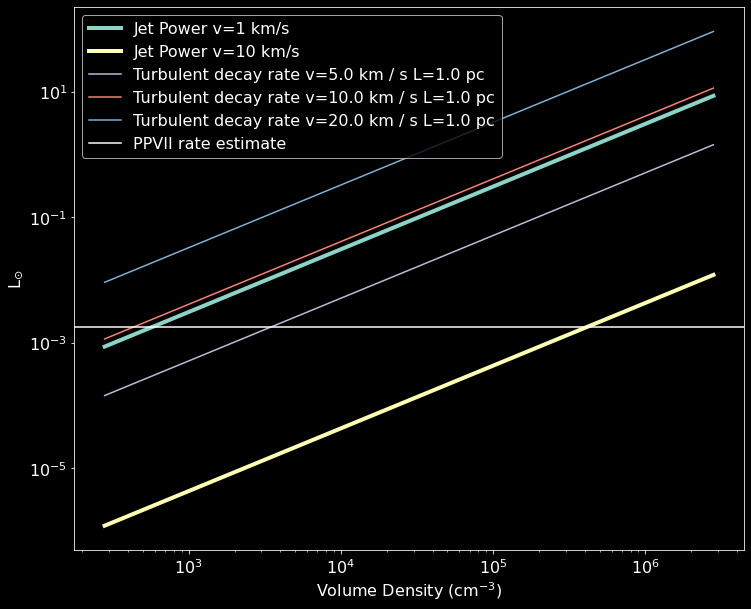

In [159]:
nstars = 1000 * u.pc**-3
volume = (0.1*u.pc) ** 3
starspeed = 1*u.km/u.s
density = np.logspace(2,6)*u.Da/u.cm**3 * 2.8

population_jet_power = jet_power(0.6*u.M_sun, 1*u.R_sun, density=density,
                                 starspeed=starspeed)[1].to(u.Lsun) * nstars * volume
population_jet_power_10kms = jet_power(0.6*u.M_sun, 1*u.R_sun, density=density,
                                       starspeed=10*u.km/u.s)[1].to(u.Lsun) * nstars * volume

lengthscale = 1 * u.pc
linewidth = 10*u.km/u.s
_=pl.loglog(density, population_jet_power, label='Jet Power v=1 km/s', linewidth=4)
_=pl.loglog(density, population_jet_power_10kms, label='Jet Power v=10 km/s', linewidth=4)
for linewidth in (5,10,20)*u.km/u.s:
    turbulent_decay_rate = density * linewidth**3 / lengthscale
    _=pl.loglog(density, turbulent_decay_rate * volume, label=f'Turbulent decay rate v={linewidth} L={lengthscale}')
_=pl.axhline(turb_lum_cmz * volume / volume_cmz, label='PPVII rate estimate')
_=pl.legend(loc='best')
_=pl.xlabel("Volume Density (cm$^{-3}$)")

This passes a basic sanity check:  there is enough energy to balance out turbulence decay.

That seems a bit surprising, but the scaling checks out really nicely: both the turbulent decay _and_ BH accretion scale with density.

The next question, then, is: what is a realistic stellar speed distribution?  Mass distribution?  Density?

What effect will we see if we incorporate the Krumholz 2006 turbulent BH model?

### How does jet power scale with mass?  Which mass dominates?

[Index](#Index)

Download some isochrones to find the scaling between mass and radius - it's basically $R \propto M^{0.3-0.7}$, apparently.

In [85]:
import requests
from bs4 import BeautifulSoup
pars = {"submit_form": "Submit", "cmd_version": "3.5", "track_parsec": "parsec_CAF09_v1.2S", "track_colibri": "parsec_CAF09_v1.2S_S_LMC_08_web", "track_postagb": "no", "n_inTPC": "10", "eta_reimers": "0.2", "kind_interp": "1", "kind_postagb": "-1", "photsys_file": "YBC_tab_mag_odfnew/tab_mag_ubvrijhk.dat", "photsys_version": "YBCnewVega", "dust_sourceM": "dpmod60alox40", "dust_sourceC": "AMCSIC15", "kind_mag": "2", "kind_dust": "0", "extinction_av": "0.0", "extinction_coeff": "constant", "extinction_curve": "cardelli", "kind_LPV": "1", "imf_file": "tab_imf/imf_kroupa_orig.dat", "isoc_isagelog": "0", "isoc_agelow": "1.0e7", "isoc_ageupp": "1.0e8", "isoc_dage": "0.0", "isoc_lagelow": "6.", "isoc_lageupp": "8.13", "isoc_dlage": "0.0", "isoc_ismetlog": "0", "isoc_zlow": "0.0152", "isoc_zupp": "0.03", "isoc_dz": "0.0", "isoc_metlow": "-2", "isoc_metupp": "0.3", "isoc_dmet": "0.0", "output_kind": "0", "output_evstage": "1", "lf_maginf": "-15", "lf_magsup": "20", "lf_deltamag": "0.5", "sim_mtot": "1.0e4",}
result = requests.post('http://stev.oapd.inaf.it/cgi-bin/cmd', data=pars)
url = BeautifulSoup(result.text).find('a')
tblreq = requests.get(f'http://stev.oapd.inaf.it/tmp/{url.attrs["href"].split("/")[-1]}')
tblreq

<Response [200]>

In [126]:
from astropy.table import Table
isochrone = Table.read(tblreq.text, format='ascii', header_start=12, data_start=13)
isochrone['Reff'] = (((10**isochrone['logL']*u.L_sun) / (10**isochrone['logTe']*u.K)**4 / constants.sigma_sb / (4 * np.pi))**0.5).to(u.R_sun)
#isochrone['Mass', 'logL', 'logTe', 'logg', 'Reff']

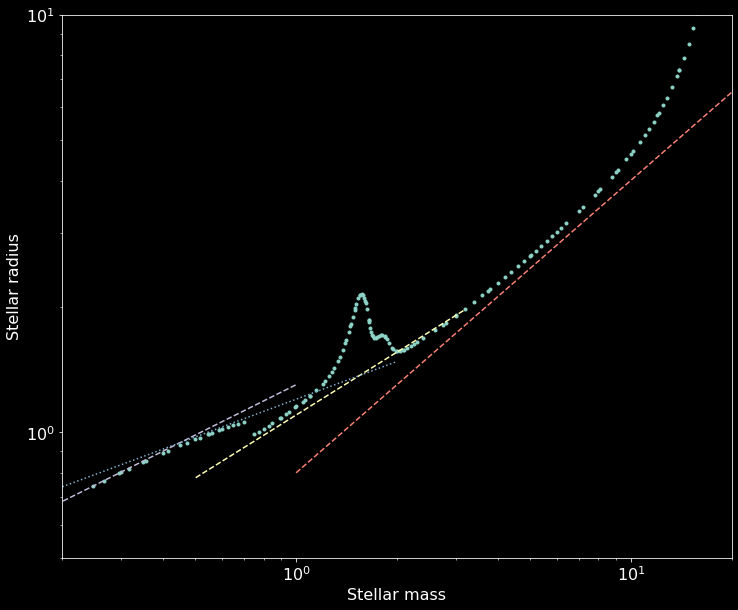

In [127]:
_=pl.loglog(isochrone['Mass'], isochrone['Reff'], '.')
_=pl.plot(np.logspace(-0.3,0.5), 1.1*np.logspace(-0.3,0.5)**0.5, '--')
_=pl.plot(np.logspace(-1,0), 1.3*np.logspace(-1,0)**0.4, '--')
_=pl.plot(np.logspace(-0,2), 0.8*np.logspace(-0,2)**0.7, '--')
_=pl.plot(np.logspace(-1,0.3), 1.2*np.logspace(-1,0.3)**0.3, ':')

_=pl.ylabel("Stellar radius")
_=pl.xlabel("Stellar mass")
_=pl.ylim(0.5, 10)
_=pl.xlim(0.2, 20)

BH accretion is only relevant for small stars anyway, so the upper limit lifetime doesn't matter.

We can adopt a simple law of $$R = 1.2 R_\odot (M/M_\odot)^{0.3}$$ as a half-decent approximation

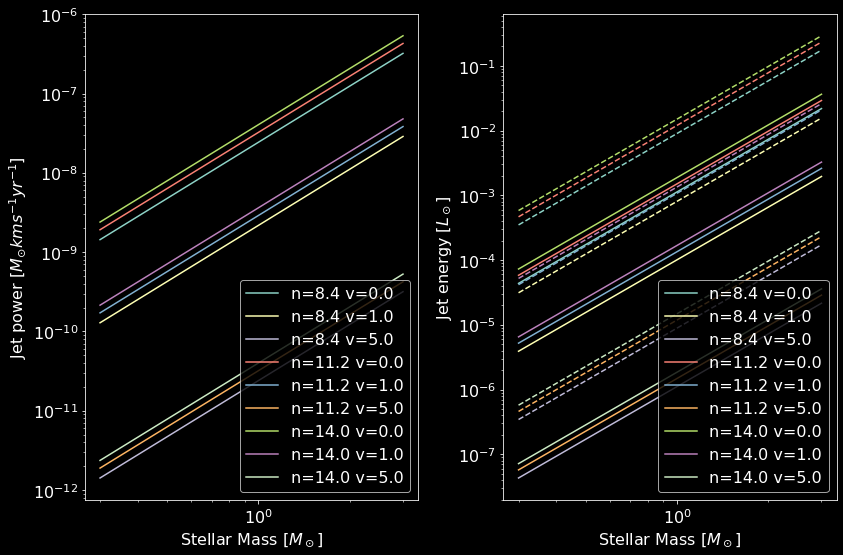

In [128]:
pl.figure(figsize=(12,8))

densities = [3,4,5]*u.Da/u.cm**3 * 2.8
starspeeds = [0, 1, 5]*u.km/u.s
soundspeed = 0.5 * u.km/u.s

masses = np.geomspace(0.3, 3)*u.M_sun
radii = 1.2 * constants.R_sun * (masses/u.M_sun)**0.3

pl.subplot(1,2,1)
for density in densities:
    for starspeed in starspeeds:
        pl.loglog(masses, jet_power(masses, radii,
                                    density=density,
                                    soundspeed=soundspeed,
                                    starspeed=starspeed)[0].to(u.Msun*u.km/u.s/u.yr),
                 label=f"n={density.value:0.1f} v={starspeed.value:0.1f}")
pl.xlabel("Stellar Mass [$M_\odot$]")
pl.ylabel("Jet power [$M_{\odot} km s^{-1} yr^{-1}$]")
pl.legend(loc='best')
pl.subplot(1,2,2)
for density in densities:

    for starspeed in starspeeds:
        mdot = mdot_bh(mass=masses, starspeed=starspeed, soundspeed=soundspeed, density=density)
        accr_lum = lacc(mdot, rstar=radii, mstar=masses)
        line, = pl.loglog(masses, jet_power(masses, radii, density=density,
                                            starspeed=starspeed)[1].to(u.Lsun),
                 label=f"n={density.value:0.1f} v={starspeed.value:0.1f}")
        pl.loglog(masses, accr_lum, linestyle='--', color=line.get_color())
pl.legend(loc='best')
pl.xlabel("Stellar Mass [$M_\odot$]")
pl.ylabel("Jet energy [$L_\odot$]")

_=pl.tight_layout()

This is all basically analytic.  Both the accretion luminosity and jet luminosity scale as

$$ L \propto M^3 / R $$
so we have, for $$R = 1.2 R_\odot (M/M_\odot)^{0.3}$$,
$$ L \propto M^{2.7} $$ 


With this simple scaling, the more massive stars weakly dominate because $N(M) \propto M^{-2.3}$.

If we assume $M_{max} = 5 M_\odot$, because most of the older ones are dead, the jet/BH-weighted mass becomes:

$$ <M> = \frac{\int L(M) M N(M) dM}{\int M N(M) dM} = \frac{\int M^{2.7} M M^{-2.3} dM}{\int M M^{-2.3} dM} = \frac{\int M^{-0.6} dM}{\int M^{-1.3} dM}$$

but we need to account for the turnover, so we use a Kroupa MF

In [134]:
import imf

In [142]:
masses = np.geomspace(0.03, 5, 10000)*u.M_sun

In [147]:
mean_mass = ((masses**2.7 * masses * imf.kroupa(masses)).sum() / (masses * imf.kroupa(masses)).sum()).value
mean_mass

0.6168181934259596

We can use this mean mass - which isn't far from the fiducial 1 $M_\odot$.

# Star-powered feedback

[Index](#Index)

How much energy is directly imparted from regular old main-sequence stars to the ISM?

(this is a sanity check: if the stars' luminosities are responsible for all the energy input, we don't care about the outflow energy)

In order for the energy to couple to the ISM, it must be trapped - the optical depth at the mean wavelength should be about 1.

We therefore want an attenuation by dust at $\tau=1$, so since $e^{-\tau} = 10^{-A_\lambda/2.5}$,
$$A_\lambda = 2.5 / \ln(10) = 1.086$$ 

For a sun-like star, we'll assume the mean photon wavelength $\lambda\approx5000 \mathring{A}$ so $A_\lambda=A_V$

https://ui.adsabs.harvard.edu/abs/2009MNRAS.400.2050G/abstract
$$N_H (cm^{-2}) = (2.21 \pm0.09) x10^{21} A_V (mag)$$

In [30]:
h_per_h2 = 2
av_to_tau = (2.5/np.log(10))
nh_per_av = 2.2e21 * u.cm**-2
column_for_av = nh_per_av * av_to_tau / h_per_h2

In [31]:
density = 1e5*u.cm**-3
lengthscale_for_density = (column_for_av/density).to(u.pc)
lengthscale_for_density

<Quantity 0.00387049 pc>

In [32]:
tau1_escape_fraction = np.exp(-1)
tau1_escape_fraction

0.36787944117144233

In [33]:
density = 1e4*u.cm**-3
lengthscale_for_density = (column_for_av/density).to(u.pc)
lengthscale_for_density

<Quantity 0.03870495 pc>

As long as the length scale is smaller than the cloud, the radiation will be absorbed with ~2/3 efficiency.

For Galactic Center clouds with $n(H_2) \gtrsim 10^4$ cm$^{-3}$, the length scale is always smaller than the cloud.

For cooler stars - which includes both wimpy M-dwarves and more relevant M-giants - the extinction is lower.

For a conservative $T_*\sim 3000$ K, with peak at 1 $\mu$m, we have:

In [34]:
a_1um_to_AV = cardelli_law(1*u.um)
a_1um_to_AV

0.3983333333333333

In [35]:
h_per_h2 = 2
a1um_to_tau = (2.5/np.log(10)) / a_1um_to_AV
nh_per_av = 2.2e21 * u.cm**-2
column_for_a1um = nh_per_av * a1um_to_tau / h_per_h2
density = 1e4*u.cm**-3
lengthscale_for_density = (column_for_a1um/density).to(u.pc)
lengthscale_for_density

<Quantity 0.09716723 pc>

To get the energy injection right, we really need a Stellar Population Synthesis model (e.g., SPISEA).  But to first order, let's just assume the stars have mean luminosity 0.1 Msun...

In [36]:
stellar_density = 1000 * u.pc**-3
stellar_luminosity = 0.1*u.L_sun
heating_rate_stellar = stellar_density * stellar_luminosity
gas_density = 1e4*u.cm**-3
gas_mass_density = gas_density * 2.8*u.Da
soundspeed = 0.5*u.km/u.s
cooling_rate_gas = 1e-27*u.erg/u.s # ballpark, order-of-magnitude, e.g. Krumholz 2014 fig 10: 10^-27 erg/s/H
(heating_rate_stellar/density).to(u.erg/u.s), cooling_rate_gas.to(u.erg/u.s)

(<Quantity 1.30292763e-24 erg / s>, <Quantity 1.e-27 erg / s>)

That fiducial cooling rate of the gas is very comparable to the heating rate from stars.

However, the gas cooling rate isn't necessarily relevant; dust is doing all the absorbing, so what's the dust luminosity, and in turn, what's the dust equilibrium temperature?

First order, we treat dust as a blackbody, so $L/A = \sigma_{SB} T^4$.  Coarsely, we can turn this to $L/V = \sigma_{SB} T^4 / \ell$, where $\ell$ is the $\tau=1$ length scale at the peak of emission, to get the cooling rate per volume.  This... is not a trivial calculation.

In [37]:
def cooling_rate(temperature=25*u.K, density=1e4*u.cm**-3):
    # this is problematic because the density cancels out, but it shouldn't.  
    peak_wavelength = (2900*u.um*u.K / temperature)
    alambda_to_av = cardelli_law(wavelength=peak_wavelength)
    alambda_to_tau = (2.5/np.log(10)) / alambda_to_av
    column_for_alambda = nh_per_av * alambda_to_tau / h_per_h2
    lengthscale = (column_for_alambda/density).to(u.pc)
    return (constants.sigma_sb*(temperature)**4 / lengthscale / density).to(u.erg/u.s)

cooling_rate()

<Quantity 3.50529081e-24 erg / s>

In [38]:
from astropy.visualization import quantity_support
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7effea666c90>

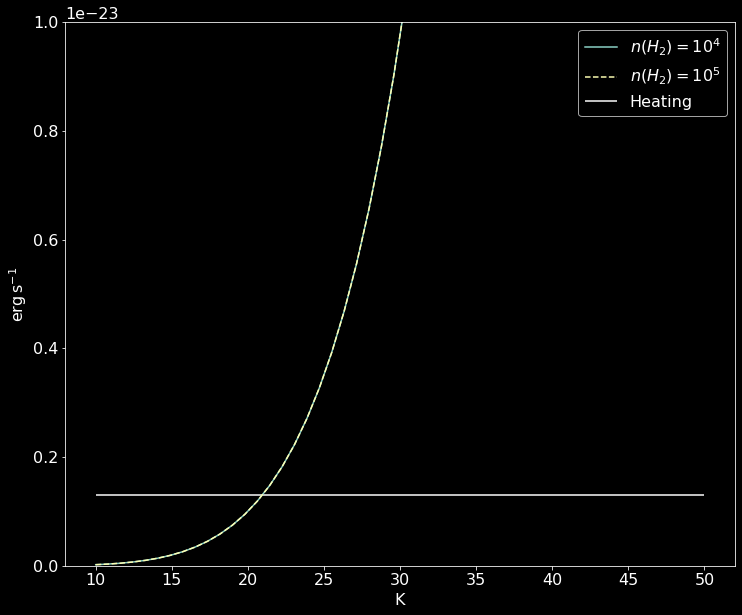

In [39]:

tems = np.linspace(10, 50)*u.K
pl.plot(tems, cooling_rate(tems, density=1e4*u.cm**-3), label='$n(H_2) = 10^4$')
pl.plot(tems, cooling_rate(tems, density=1e5*u.cm**-3), label='$n(H_2) = 10^5$', linestyle='--')
pl.hlines((heating_rate_stellar/(1e4*u.cm**-3)).to(u.erg/u.s), tems.min(), tems.max(), color='w', label='Heating')
pl.ylim(0,1e-23)
pl.legend(loc='best')

So, the dust is _obscenely_ efficient at radiating away absorbed energy.

Stellar radiation can be absorbed and radiated away at ~100 microns with ease.

# BH "Turnover Time"

[Index](#Index)


If stars are accreting at some fixed rate, how long would it take to accrete _all_ the gas and "reprocess" it?

### If the stars are moving at ~5 km/s, too long

[Index](#Index)


In [40]:
stars_per_vol = 1000
gas_density = 1e5*u.cm**-3*u.Da
mass_procd = mdot_bh(1*u.Msun, 0.5*u.km/u.s, gas_density, machnumber=0, starspeed=5*u.km/u.s) * stars_per_vol
mass_gas = gas_density * u.pc**3
print(f"Time to reprocess total mass: {(mass_gas / mass_procd).to(u.Myr)}")

Time to reprocess total mass: 485.19232798422314 Myr


In [41]:
stars_per_vol = 1000
gas_density = 1e6*u.cm**-3*u.Da
mass_procd = mdot_bh(1*u.Msun, 0.5*u.km/u.s, gas_density, machnumber=0, starspeed=5*u.km/u.s) * stars_per_vol
mass_gas = gas_density *u.pc**3
print(f"Time to reprocess total mass: {(mass_gas / mass_procd).to(u.Myr)}")

Time to reprocess total mass: 485.19232798422314 Myr


### If the stars are barely moving, the total-accretion timescale is ~1.5 Myr

[Index](#Index)


This is implausibly short; if gas could be accreted by old stars this quickly, there would be no room for fresh star formation.

In [42]:
stars_per_vol = 1000
gas_density = 1e6*u.cm**-3*u.Da
mass_procd = mdot_bh(1*u.Msun, 0.5*u.km/u.s, gas_density, machnumber=0, starspeed=0.5*u.km/u.s) * stars_per_vol
mass_gas = gas_density *u.pc**3
print(f"Time to reprocess total mass: {(mass_gas / mass_procd).to(u.Myr)}")

Time to reprocess total mass: 1.3520005175907879 Myr


# Next steps

[Index](#Index)

Focus on the momentum question.  

How much momentum is in the CMZ?  Is it reported in those terms?

How are momentum and energy related?

Nakamura & Li 2014 (http://adsabs.harvard.edu/abs/2014ApJ...783..115N) give the turbulent momentum decay rate:

$$ \frac{d P_{turb}}{dt} = -0.21 \frac{M_{cl} \sigma_{3d} }{t_{diss}}$$

where the dissipation timescale

$$t_{diss} = \frac{R_{cl}}{\sigma_{3d}}$$

So... the dissipation timescale is just the "turbulent crossing time" $L / (\mathcal{M}  c_s)$

# Decay Timescale for Turbulence in the CMZ

[Index](#Index)


See also [PPVII estimate](#PPVII-estimate-of-turb-lum)

In [43]:
cmz_sigma = 12*u.km/u.s
cmz_sizescale = 20*u.pc
cmz_soundspeed = ((constants.k_B * 50*u.K / (2.8*u.Da))**0.5).to(u.km/u.s)
cmz_Mach = cmz_sigma / cmz_soundspeed
cmz_soundspeed, cmz_Mach

(<Quantity 0.38532136 km / s>, <Quantity 25.95236382>)

In [44]:
turb_diss_time = (cmz_sizescale / cmz_sigma).to(u.Myr)
turb_diss_time

<Quantity 0.97779222 Myr>

The momentum loss rate...

In [45]:
mass_scale = 1e5*u.M_sun # 1 "brick"
momentum_loss_rate = -0.21 * mass_scale * cmz_sigma / turb_diss_time
momentum_loss_rate.to(u.Msun *u.km/u.s / u.yr)

<Quantity -0.21476955 km solMass / (s yr)>

In [164]:
# estimate from PPVII review
turb_lum_cmz

<Quantity 2.8e+39 erg / s>

In [167]:
# cmz energy scale
energy_cmz = (mass_cmz * linewidth_cmz**2 * 0.5).to(u.erg)
energy_cmz

In [169]:
turb_diss_time_energy = (energy_cmz / turb_lum_cmz).to(u.Myr)
turb_diss_time_energy

<Quantity 0.81011451 Myr>